# Library&Package Import

In [28]:
import pandas as pd
import numpy as np

# Read Dataset

In [29]:
dna_df = pd.read_csv("cleaned_codon_usage.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,100217,1995,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,100220,1474,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,100755,4862,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,100880,1915,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,100887,22831,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,9601,1097,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,9601,2067,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,9602,1686,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,9606,40662582,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


# Normalization

In [30]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['Kingdom']
x = dna_df.drop(columns=['Unnamed: 0', 'DNAtype', 'Kingdom', 'SpeciesID', 'Ncodons'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

# PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)  
x_scaled = pca.fit_transform(x_scaled) 
pca.explained_variance_ratio_

array([0.35063693, 0.20579774, 0.05714541, 0.03743535, 0.03364339,
       0.03175274, 0.02082726, 0.01942239, 0.01539246, 0.01362371])

Text(0.5, 1.0, 'Principal component V.S. Percentage of variance explained')

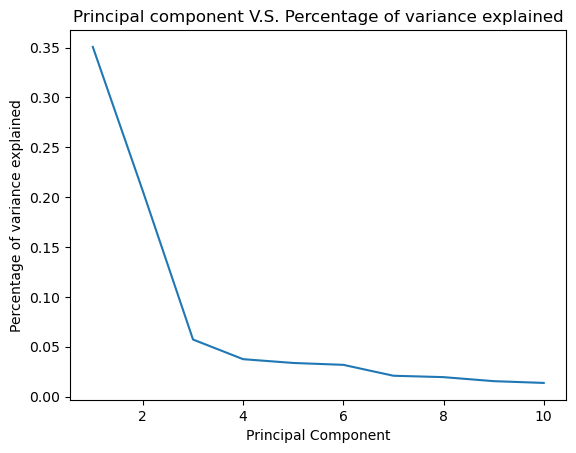

In [32]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.plot(range(1,11),pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of variance explained')
plt.title('Principal component V.S. Percentage of variance explained')

# Data split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10369, 10) (2593, 10) (10369,) (2593,)


# BernoulliNB

# Cross validation

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.009719, 0.225085, 0.529775, 0.01697, 0.218451], ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(x_train,y_train)

print('Best Parameters : {}'.format(bernoulli_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(bernoulli_nb_grid.best_score_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.01, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.744



# BernoulliNB

In [37]:
best_params = {'alpha': 0.01, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}
best_model = BernoulliNB(**best_params)
best_model.fit(x_train,y_train)
y_pred1=best_model.predict(x_test)
y_pred1

array([2, 2, 2, ..., 4, 1, 2], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='macro', labels=np.unique(y_pred1))
recall = recall_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')

print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_score: ',f1)

accuracy_score:  0.7365985345160047
precision_score:  0.7205736288021751
recall_score:  0.43373090926999397
f1_score:  0.4325176757548753


In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))
auc = roc_auc_score(y_test, best_model.predict_proba(x_test), multi_class='ovr')
print('auc_score: ', auc)

Confusion matrix :
 [[   0    5   23    0   10]
 [   0  425  123    0   26]
 [   0   65 1150    0  160]
 [   0   24   15    0    1]
 [   0   33  198    0  335]]

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.77      0.74      0.75       574
           2       0.76      0.84      0.80      1375
           3       0.00      0.00      0.00        40
           4       0.63      0.59      0.61       566

    accuracy                           0.74      2593
   macro avg       0.43      0.43      0.43      2593
weighted avg       0.71      0.74      0.72      2593

auc_score:  0.9093194544342718


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GuassianNB

In [43]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train)
gaussian_nb.class_prior_

array([0.0105121 , 0.22220079, 0.53177741, 0.01784164, 0.21766805])

In [44]:
params = {
            'priors': [None, [0.009719, 0.225085, 0.529775, 0.01697, 0.218451],],
            'var_smoothing': [1e-9, 1e-6, 1e-12],
         }

gaussian_nb_grid = GridSearchCV(GaussianNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
gaussian_nb_grid.fit(x_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(gaussian_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(gaussian_nb_grid.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Accuracy Through Grid Search : 0.744
Best Parameters : {'priors': [0.009719, 0.225085, 0.529775, 0.01697, 0.218451], 'var_smoothing': 1e-09}



In [45]:
best_params = {'priors': [0.009719, 0.225085, 0.529775, 0.01697, 0.218451], 'var_smoothing': 1e-09}
best_model = GaussianNB(**best_params)
best_model.fit(x_train,y_train)
y_pred1=best_model.predict(x_test)
y_pred1

array([1, 2, 2, ..., 2, 3, 2], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='macro')
recall = recall_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')

print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_score: ',f1)

accuracy_score:  0.7358272271500192
precision_score:  0.5828436910973174
recall_score:  0.6493272515710753
f1_score:  0.6001504577942001


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))
auc = roc_auc_score(y_test, best_model.predict_proba(x_test), multi_class='ovr')
print('auc_score: ', auc)

Confusion matrix :
 [[  9   4   2   0   2]
 [ 10 521  35  15  32]
 [  7  97 879   7 364]
 [  0  16   1  13   5]
 [  2  27  58   1 486]]

Classification report :
               precision    recall  f1-score   support

           0       0.32      0.53      0.40        17
           1       0.78      0.85      0.82       613
           2       0.90      0.65      0.75      1354
           3       0.36      0.37      0.37        35
           4       0.55      0.85      0.66       574

    accuracy                           0.74      2593
   macro avg       0.58      0.65      0.60      2593
weighted avg       0.78      0.74      0.74      2593

auc_score:  0.9243786177743154


# No PCA

In [48]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['Kingdom']
x = dna_df.drop(columns=['Unnamed: 0', 'DNAtype', 'Kingdom', 'SpeciesID', 'Ncodons'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10369, 64) (2593, 64) (10369,) (2593,)


# ComplementNB

In [50]:
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB()
complement_nb.fit(x_train, y_train)

ComplementNB()

In [51]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'norm': [True, False],
          'class_prior': [None, [0.009719, 0.225085, 0.529775, 0.01697, 0.218451]]
         }

complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
complement_nb_grid.fit(x_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(complement_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(complement_nb_grid.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Accuracy Through Grid Search : 0.615
Best Parameters : {'alpha': 10.0, 'class_prior': None, 'fit_prior': True, 'norm': False}



In [52]:
best_params = {'alpha': 10.0, 'class_prior': None, 'fit_prior': True, 'norm': False}
best_model = ComplementNB(**best_params)
best_model.fit(x_train,y_train)
y_pred1=best_model.predict(x_test)
y_pred1

array([1, 4, 2, ..., 1, 4, 2], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='macro')
recall = recall_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')

print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_score: ',f1)

accuracy_score:  0.6047049749325106
precision_score:  0.3557993663065794
recall_score:  0.38623885918003564
f1_score:  0.36044623322517966


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))
auc = roc_auc_score(y_test, best_model.predict_proba(x_test), multi_class='ovr')
print('auc_score: ', auc)

Confusion matrix :
 [[  0   9  10   0   6]
 [  0 398  95   0 104]
 [  0 328 784   0 248]
 [  0  33   2   0  15]
 [  0 101  74   0 386]]

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.46      0.67      0.54       597
           2       0.81      0.58      0.67      1360
           3       0.00      0.00      0.00        50
           4       0.51      0.69      0.58       561

    accuracy                           0.60      2593
   macro avg       0.36      0.39      0.36      2593
weighted avg       0.64      0.60      0.61      2593

auc_score:  0.7944333356643155


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MultinomialNB

In [55]:
from sklearn.naive_bayes import MultinomialNB

multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train, y_train)
multinomial_nb.class_log_prior_

array([-4.63145535, -1.4972534 , -0.632619  , -4.11077743, -1.51904075])

In [56]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.009719, 0.225085, 0.529775, 0.01697, 0.218451], ]
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(x_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(multinomial_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(multinomial_nb_grid.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.622
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}



In [57]:
best_params = {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}
best_model = MultinomialNB(**best_params)
best_model.fit(x_train,y_train)
y_pred1=best_model.predict(x_test)
y_pred1

array([2, 2, 2, ..., 1, 2, 2], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='macro')
recall = recall_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')

print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_score: ',f1)

accuracy_score:  0.6143463170073274
precision_score:  0.40728739984007056
recall_score:  0.2969219314039001
f1_score:  0.2741944630558388


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))
auc = roc_auc_score(y_test, best_model.predict_proba(x_test), multi_class='ovr')
print('auc_score: ', auc)

Confusion matrix :
 [[   0    2   23    0    0]
 [   0  320  277    0    0]
 [   0   95 1261    0    4]
 [   0   11   39    0    0]
 [   0   36  513    0   12]]

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.69      0.54      0.60       597
           2       0.60      0.93      0.73      1360
           3       0.00      0.00      0.00        50
           4       0.75      0.02      0.04       561

    accuracy                           0.61      2593
   macro avg       0.41      0.30      0.27      2593
weighted avg       0.63      0.61      0.53      2593

auc_score:  0.8680081839151021


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
